## Figure 8: 

Time evolution of spatially integrated diabatic PV tendencies accumulated between (a) 10-12 km, (b) 6-8 km, (c) 2-4 km, and (d) 0-2 km for CRH simulation. Panels (e-h) show the diabatic PV differences between the CRH and REF simulations (CRH-REF). Note the different scales in panels.

-----------------------

@ Behrooz Keshtgar, KIT 2022

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
import colorlegend

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.19.1
matplotlib: 3.3.0


## 2- Loading datasets

In [3]:
# Dictionary for loading simulations
simdict = {
         'LC1-channel-4000x9000km-2km-0002' : {'res':'2.5km', 'radiation':0, 'rh':0.8, 'mphy':1}, # No radiation 
         'LC1-channel-4000x9000km-2km-0003' : {'res':'2.5km', 'radiation':1, 'rh':0.8, 'mphy':1}, # Cloud radiation 
         }

In [4]:
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 
        print('Working on loading data for', sim)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        # datasets
        fname = path+"pv_tendencies.nc"
        ds_var = xr.open_mfdataset(fname)
        ds_list.append(ds_var)
        
        del ds_var
    return ds_list
#----------------------------------
ds_list = load_simulations()

Working on loading data for LC1-channel-4000x9000km-2km-0002
Working on loading data for LC1-channel-4000x9000km-2km-0003


## 3- Spatial integral of diabatic PV tendencies and their differences to the REF simulation

In [5]:
# excluding boundaries
ds_list[0] = ds_list[0].sel(lat=slice(10,70))
ds_list[1] = ds_list[1].sel(lat=slice(10,70))

# spatial integral time series
def spin_ts(var):
    dA = np.cos(np.deg2rad(45))
    dA = np.broadcast_to(dA.reshape((1, 1)), (len(var.lat), len(var.lon))).copy()
    dA /= dA.sum(axis=(0,1))
    feild = (var*dA[None,:,:]).sum(axis=(1,2)) 
    return(feild)

In [6]:
for i in range(len(ds_list)):
    if i == 1:
        for var in ['ddt_pv_z_mphy','ddt_pv_z_radlw','ddt_pv_z_turb','ddt_pv_z_radsw','ddt_pv_z_pconv']:
            # 10-12 km
            ds_list[i][var+'_sp_upp']=spin_ts(ds_list[i][var].sel(height=slice(26,31)).sum('height')*1e6).compute()
            # 6-8 km
            ds_list[i][var+'_sp_mid']=spin_ts(ds_list[i][var].sel(height=slice(35,42)).sum('height')*1e6).compute()
            # 4-2 km
            ds_list[i][var+'_sp_low']=spin_ts(ds_list[i][var].sel(height=slice(48,58)).sum('height')*1e6).compute()
            # 0-2 km
            ds_list[i][var+'_sp_bnd']=spin_ts(ds_list[i][var].sel(height=slice(58,75)).sum('height')*1e6).compute()
        # total      
        ds_list[i]['ddt_pv_z_totphy_sp_upp'] =  ds_list[i]['ddt_pv_z_mphy_sp_upp'] + ds_list[i]['ddt_pv_z_radlw_sp_upp'] + ds_list[i]['ddt_pv_z_radsw_sp_upp'] + ds_list[i]['ddt_pv_z_pconv_sp_upp'] + ds_list[i]['ddt_pv_z_turb_sp_upp']
        ds_list[i]['ddt_pv_z_totphy_sp_mid'] =  ds_list[i]['ddt_pv_z_mphy_sp_mid'] + ds_list[i]['ddt_pv_z_radlw_sp_mid'] + ds_list[i]['ddt_pv_z_radsw_sp_mid'] + ds_list[i]['ddt_pv_z_pconv_sp_mid'] + ds_list[i]['ddt_pv_z_turb_sp_mid']
        ds_list[i]['ddt_pv_z_totphy_sp_low'] =  ds_list[i]['ddt_pv_z_mphy_sp_low'] + ds_list[i]['ddt_pv_z_radlw_sp_low'] + ds_list[i]['ddt_pv_z_radsw_sp_low'] + ds_list[i]['ddt_pv_z_pconv_sp_low'] + ds_list[i]['ddt_pv_z_turb_sp_low']
        ds_list[i]['ddt_pv_z_totphy_sp_bnd'] =  ds_list[i]['ddt_pv_z_mphy_sp_bnd'] + ds_list[i]['ddt_pv_z_radlw_sp_bnd'] + ds_list[i]['ddt_pv_z_radsw_sp_bnd'] + ds_list[i]['ddt_pv_z_pconv_sp_bnd'] + ds_list[i]['ddt_pv_z_turb_sp_bnd']
    else:
        for var in ['ddt_pv_z_mphy','ddt_pv_z_radlw','ddt_pv_z_turb','ddt_pv_z_radsw','ddt_pv_z_pconv']:
            # 10-12 km
            ds_list[i][var+'_sp_upp']=spin_ts(ds_list[i][var].sel(height=slice(26,31)).sum('height')*1e6).compute()
            # 6-8 km
            ds_list[i][var+'_sp_mid']=spin_ts(ds_list[i][var].sel(height=slice(35,42)).sum('height')*1e6).compute()
            # 4-2 km
            ds_list[i][var+'_sp_low']=spin_ts(ds_list[i][var].sel(height=slice(48,58)).sum('height')*1e6).compute()
            # 0-2 km
            ds_list[i][var+'_sp_bnd']=spin_ts(ds_list[i][var].sel(height=slice(58,75)).sum('height')*1e6).compute()
        #total      
        ds_list[i]['ddt_pv_z_totphy_sp_upp'] =  ds_list[i]['ddt_pv_z_mphy_sp_upp'] + ds_list[i]['ddt_pv_z_pconv_sp_upp'] + ds_list[i]['ddt_pv_z_turb_sp_upp']
        ds_list[i]['ddt_pv_z_totphy_sp_mid'] =  ds_list[i]['ddt_pv_z_mphy_sp_mid'] + ds_list[i]['ddt_pv_z_pconv_sp_mid'] + ds_list[i]['ddt_pv_z_turb_sp_mid']
        ds_list[i]['ddt_pv_z_totphy_sp_low'] =  ds_list[i]['ddt_pv_z_mphy_sp_low'] + ds_list[i]['ddt_pv_z_pconv_sp_low'] + ds_list[i]['ddt_pv_z_turb_sp_low']
        ds_list[i]['ddt_pv_z_totphy_sp_bnd'] =  ds_list[i]['ddt_pv_z_mphy_sp_bnd'] + ds_list[i]['ddt_pv_z_pconv_sp_bnd'] + ds_list[i]['ddt_pv_z_turb_sp_bnd']

In [7]:
# differences
# CRH - REF
for var in ['ddt_pv_z_totphy','ddt_pv_z_mphy','ddt_pv_z_radlw','ddt_pv_z_turb','ddt_pv_z_radsw','ddt_pv_z_pconv']:
    ds_list[0][var+'_diff_upp'] = ds_list[1][var+'_sp_upp'] - ds_list[0][var+'_sp_upp']
    ds_list[0][var+'_diff_mid'] = ds_list[1][var+'_sp_mid'] - ds_list[0][var+'_sp_mid']
    ds_list[0][var+'_diff_low'] = ds_list[1][var+'_sp_low'] - ds_list[0][var+'_sp_low']
    ds_list[0][var+'_diff_bnd'] = ds_list[1][var+'_sp_bnd'] - ds_list[0][var+'_sp_bnd']

## 4- Plot

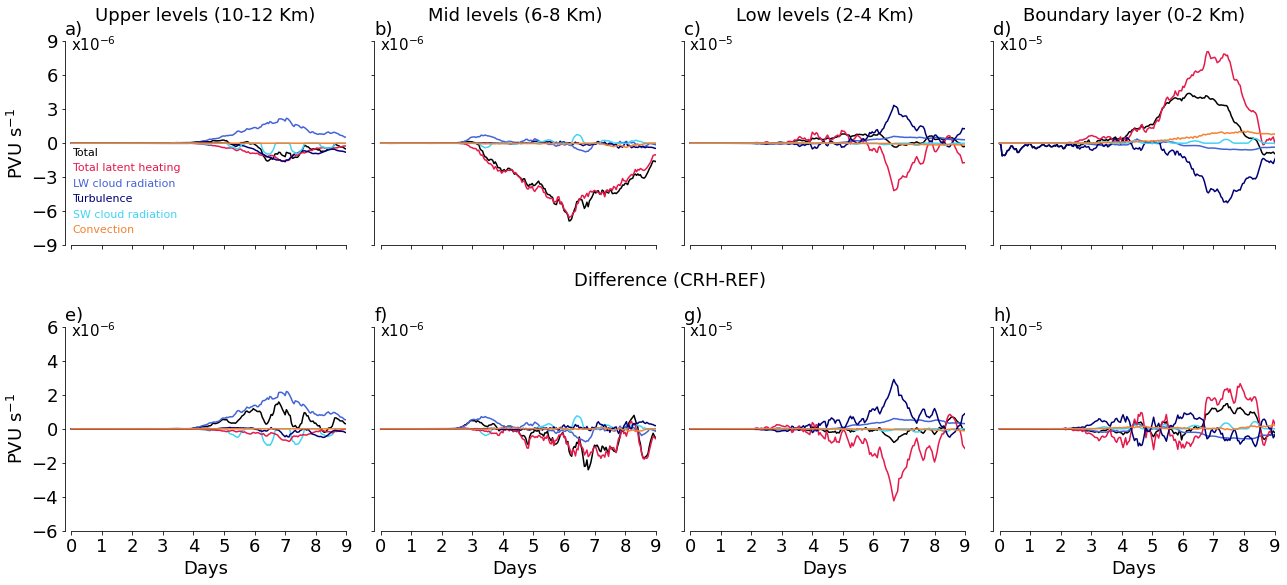

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 8.5))

i = 0

for ax in axes.flat:
    
    ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
    ax.tick_params(labelsize=18)
    ax.set_xlim([0, 216])
    
    ax.spines['bottom'].set_bounds(0,216)
    ax.set_xticks(np.arange(0,217,24))
    ax.set_xticklabels(["0","1", "2", "3", "4", "5","6","7","8","9"])
    ax.set_xlim([-5, 216])
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    if i == 0:

        ax.plot(ds_list[1]['ddt_pv_z_totphy_sp_upp']*1e6,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_mphy_sp_upp']*1e6,'#e6194B',label="Total latent heating",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_upp']*1e6,'#4363d8',label="LW cloud radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_turb_sp_upp']*1e6,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_upp']*1e6,'#42d4f4',label="SW cloud radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_pconv_sp_upp']*1e6,'#f58231',label="Convection",linewidth=1.5)
        
        ax.set_title('Upper levels (10-12 Km)',fontsize=18,pad=20)
        ax.text(0.0, 1.03, 'a)', transform=ax.transAxes, 
            size=18 )
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.set_ylabel('PVU s$^{-1}$',fontsize=18)
        ax.set_xticklabels([])
        ax.spines['left'].set_bounds(-9,9)
        ax.set_yticks(np.arange(-9,12,3))
        ax.set_ylim([-9,9])
        lg=colorlegend.color_legend(ax,loc=3,fsize=11)
        
    if i == 1:

        ax.plot(ds_list[1]['ddt_pv_z_totphy_sp_mid']*1e6,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_mphy_sp_mid']*1e6,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_mid']*1e6,'#4363d8',label="Cloud_lw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_turb_sp_mid']*1e6,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_mid']*1e6,'#42d4f4',label="Cloud_sw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_pconv_sp_mid']*1e6,'#f58231',label="Convection",linewidth=1.5)
        
        ax.set_title('Mid levels (6-8 Km)',fontsize=18,pad=20) 
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.spines['left'].set_bounds(-9,9)
        ax.set_yticks(np.arange(-9,12,3))
        ax.set_ylim([-9,9])
        ax.text(0.0, 1.03, 'b)', transform=ax.transAxes, 
            size=18 )
        
    if i == 2:

        ax.plot(ds_list[1]['ddt_pv_z_totphy_sp_low']*1e5,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_mphy_sp_low']*1e5,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_low']*1e5,'#4363d8',label="Cloud_lw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_turb_sp_low']*1e5,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_low']*1e5,'#42d4f4',label="Cloud_sw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_pconv_sp_low']*1e5,'#f58231',label="Convection",linewidth=1.5)
       
        ax.set_title('Low levels (2-4 Km)',fontsize=18,pad=20) 
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.02, 0.95, 'x10$^{-5}$', transform=ax.transAxes, 
            size=15 )
        ax.spines['left'].set_bounds(-9,9)
        ax.set_yticks(np.arange(-9,12,3))
        ax.set_ylim([-9,9])
        
        ax.text(0.0, 1.03, 'c)', transform=ax.transAxes, 
            size=18 )
        
    if i == 3:
        
        ax.plot(ds_list[1]['ddt_pv_z_totphy_sp_bnd']*1e5,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_mphy_sp_bnd']*1e5,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_bnd']*1e5,'#4363d8',label="Cloud_lw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_turb_sp_bnd']*1e5,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_bnd']*1e5,'#42d4f4',label="Cloud_sw_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_pconv_sp_bnd']*1e5,'#f58231',label="Convection",linewidth=1.5)
       
        ax.set_title('Boundary layer (0-2 Km)',fontsize=18,pad=20) 
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.02, 0.95, 'x10$^{-5}$', transform=ax.transAxes, 
            size=15 )
        ax.spines['left'].set_bounds(-9,9)
        ax.set_yticks(np.arange(-9,12,3))
        ax.set_ylim([-9,9])
        ax.text(0.0, 1.03, 'd)', transform=ax.transAxes, 
            size=18 )    
        
        
    if i == 4:
        
        ax.plot(ds_list[0]['ddt_pv_z_totphy_diff_upp']*1e6,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_upp']*1e6,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_upp']*1e6,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_mphy_diff_upp']*1e6,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_turb_diff_upp']*1e6,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_pconv_diff_upp']*1e6,'#f58231',label="Convection",linewidth=1.5)
        
        ax.text(0.0, 1.03, 'e)', transform=ax.transAxes, 
            size=18 )
        ax.set_ylabel('PVU s$^{-1}$',fontsize=18)
        ax.set_xlabel('Days',fontsize=18)
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,8,2))
        ax.set_ylim([-6,6])

    if i == 5:
        
        ax.plot(ds_list[0]['ddt_pv_z_totphy_diff_mid']*1e6,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_mid']*1e6,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_mid']*1e6,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_mphy_diff_mid']*1e6,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_turb_diff_mid']*1e6,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_pconv_diff_mid']*1e6,'#f58231',label="Convection",linewidth=1.5)
        
        ax.text(0.0, 1.03, 'f)', transform=ax.transAxes, 
            size=18 )
        ax.text(0.02, 0.95, 'x10$^{-6}$', transform=ax.transAxes, 
            size=15 )
        ax.set_yticklabels([])
        ax.set_xlabel('Days',fontsize=18)
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,8,2))
        ax.set_ylim([-6,6])
   
    if i == 6:
        
        ax.plot(ds_list[0]['ddt_pv_z_totphy_diff_low']*1e5,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_low']*1e5,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_low']*1e5,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_mphy_diff_low']*1e5,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_turb_diff_low']*1e5,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_pconv_diff_low']*1e5,'#f58231',label="Convection",linewidth=1.5)
        
        ax.text(0.0, 1.03, 'g)', transform=ax.transAxes, 
            size=18 )
        ax.text(0.02, 0.95, 'x10$^{-5}$', transform=ax.transAxes, 
            size=15 )
        ax.set_yticklabels([])
        ax.set_xlabel('Days',fontsize=18)
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,8,2))
        ax.set_ylim([-6,6])
        
    if i == 7:
        
        ax.plot(ds_list[0]['ddt_pv_z_totphy_diff_bnd']*1e5,'#000000',label="Total",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radlw_sp_bnd']*1e5,'#4363d8',label="Cloud_LW_radiation",linewidth=1.5)
        ax.plot(ds_list[1]['ddt_pv_z_radsw_sp_bnd']*1e5,'#42d4f4',label="Cloud_SW_radiation",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_mphy_diff_bnd']*1e5,'#e6194B',label="Microphysics",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_turb_diff_bnd']*1e5,'#000075',label="Turbulence",linewidth=1.5)
        ax.plot(ds_list[0]['ddt_pv_z_pconv_diff_bnd']*1e5,'#f58231',label="Convection",linewidth=1.5)
        
        ax.text(0.02, 0.95, 'x10$^{-5}$', transform=ax.transAxes, 
            size=15 )
        ax.text(0.0, 1.03, 'h)', transform=ax.transAxes, 
            size=18 )
        ax.set_yticklabels([])
        ax.set_xlabel('Days',fontsize=18)
        ax.spines['left'].set_bounds(-6,6)
        ax.set_yticks(np.arange(-6,8,2))
        ax.set_ylim([-6,6])
        
    i = i + 1
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.1, hspace=0.4)   

plt.text(.45, 0.5, 'Difference (CRH-REF)', transform=fig.transFigure, horizontalalignment='center',fontsize=18)

plt.savefig('figure8.pdf', bbox_inches = 'tight')
plt.savefig('figure8.png', bbox_inches = 'tight',dpi=100)